#Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Carregar dados

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


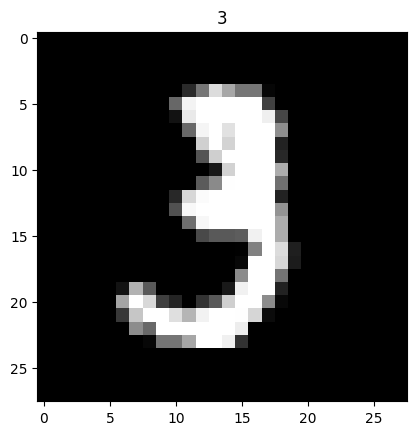

In [ ]:
plt.imshow(X_train[10], cmap="gray")
plt.title(f"{y_train[10]}")
plt.show()

#Pré-processamento dos dados

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


#Montagem do modelo

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

#Determinação de hiperparâmetros

In [ ]:
batch_size = 128
epochs = 30
loss = "categorical_crossentropy"
optimizer = "adam"
metric = ["accuracy"]

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metric)

#Treino

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)

In [ ]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7947 - loss: 0.7159 - val_accuracy: 0.9582 - val_loss: 0.1345
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9677 - loss: 0.1059 - val_accuracy: 0.9762 - val_loss: 0.0838
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9762 - loss: 0.0775 - val_accuracy: 0.9762 - val_loss: 0.0793
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.0587 - val_accuracy: 0.9793 - val_loss: 0.0674
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9857 - loss: 0.0455 - val_accuracy: 0.9811 - val_loss: 0.0591
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9818 - val_loss: 0.0584
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0314 - val_accuracy: 0.9808 - val_loss: 0.0600
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.

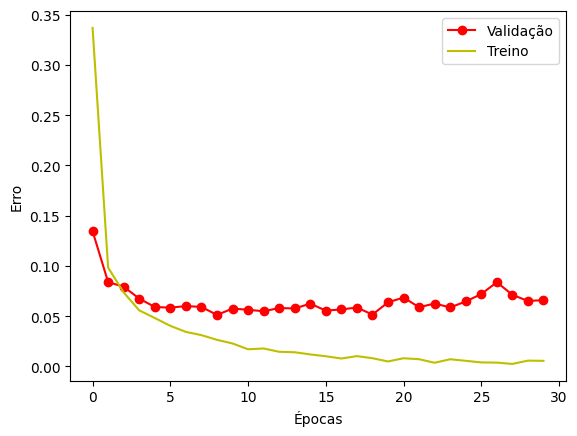

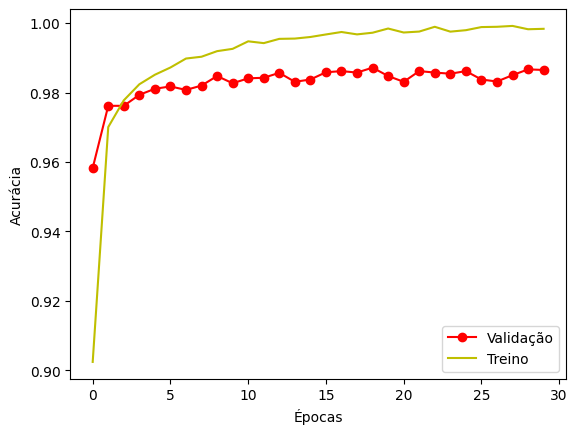

In [ ]:
plt.figure()
plt.plot(history.epoch, history.history["val_loss"], "o-r", label="Validação")
plt.plot(history.epoch, history.history["loss"], "-y", label="Treino")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.legend()

plt.figure()
plt.plot(history.epoch, history.history["val_accuracy"], "o-r", label="Validação")
plt.plot(history.epoch, history.history["accuracy"], "-y", label="Treino")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

#Teste

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Custo na base de teste: {score[0]}")
print(f"Acurácia na base de teste: {score[1]}")

Custo na base de teste: 0.0679551288485527
Acurácia na base de teste: 0.9868999719619751


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(y_pred.shape, y_true.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,) (10000,)


<Axes: >

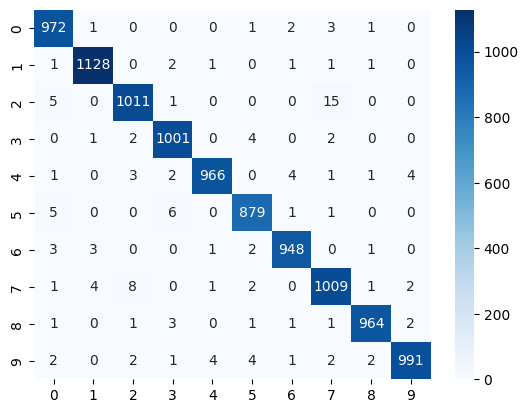

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")